# Pandas

- built on top of numpy
- data preprocessing library

In [2]:
import numpy as np
import pandas as pd

In [3]:
a = pd.Series(data=[1,2,3,4], index=['a','b','c','d'])

In [4]:
a['a']

1

In [5]:
myDict = {'e' : 20 ,
         'f' : 200,
         'g' : 2000,
         'h' : 50}

In [6]:
pd.Series(myDict)

e      20
f     200
g    2000
h      50
dtype: int64

In [7]:
mySeries1 = pd.Series(data=[1,2,3,4,5], index=['a','b','c','d','e'])

In [8]:
mySeries2 = pd.Series(data=[1,2,7,4,2], index=['a','b', 'c', 'f', 'e'])

In [9]:
mySeries1 + mySeries2

a     2.0
b     4.0
c    10.0
d     NaN
e     7.0
f     NaN
dtype: float64

In [10]:
mySeries2

a    1
b    2
c    7
f    4
e    2
dtype: int64

In [11]:
myData = np.random.randn(3,4)

In [12]:
myData

array([[-0.51916907, -1.48446328, -0.89385074, -0.98089958],
       [-0.212382  ,  0.16032903, -0.4217866 ,  0.10869909],
       [-0.92805917,  0.34415436, -0.53821427, -0.54213674]])

In [13]:
df = pd.DataFrame(myData, index=['R1', 'R2', 'R3'], columns=['C1', 'C2', 'C3', 'C4'])

In [14]:
df

,C1,C2,C3,C4
R1,-0.519169,-1.484463,-0.893851,-0.980900
R2,-0.212382,0.160329,-0.421787,0.108699
R3,-0.928059,0.344154,-0.538214,-0.542137


In [15]:
df[['C1', 'C3']][df['C3'] < 0][df['C1'] > 0]

,C1,C3


In [16]:
df['C5'] =df['C1']  * df['C3']

In [17]:
df

,C1,C2,C3,C4,C5
R1,-0.519169,-1.484463,-0.893851,-0.980900,0.464060
R2,-0.212382,0.160329,-0.421787,0.108699,0.089580
R3,-0.928059,0.344154,-0.538214,-0.542137,0.499495


In [18]:
df.drop('C2',axis = 1, inplace=True)

In [19]:
df

,C1,C3,C4,C5
R1,-0.519169,-0.893851,-0.980900,0.464060
R2,-0.212382,-0.421787,0.108699,0.089580
R3,-0.928059,-0.538214,-0.542137,0.499495


In [20]:
df.loc[['R1', 'R2'],['C1','C3']]

,C1,C3
R1,-0.519169,-0.893851
R2,-0.212382,-0.421787


## Conditional selection

In [21]:
df

,C1,C3,C4,C5
R1,-0.519169,-0.893851,-0.980900,0.464060
R2,-0.212382,-0.421787,0.108699,0.089580
R3,-0.928059,-0.538214,-0.542137,0.499495


In [22]:
df > 0 ## returns boolean dataframe

,C1,C3,C4,C5
R1,False,False,False,True
R2,False,False,True,True
R3,False,False,False,True


In [23]:
df[df>0] ## True values are displayed whereas NaN is diplayed in palce of False values

,C1,C3,C4,C5
R1,NaN,NaN,NaN,0.464060
R2,NaN,NaN,0.108699,0.089580
R3,NaN,NaN,NaN,0.499495


In [24]:
df[df['C4'] > 0]

,C1,C3,C4,C5
R2,-0.212382,-0.421787,0.108699,0.08958


## Multiple conditions in pandas

In [25]:
df[:][(df['C1'] > 0) | (df['C3'] < 0)]

,C1,C3,C4,C5
R1,-0.519169,-0.893851,-0.980900,0.464060
R2,-0.212382,-0.421787,0.108699,0.089580
R3,-0.928059,-0.538214,-0.542137,0.499495


In [26]:
newData = ['r1','r2','r3']

In [27]:
df['newCol'] = newData

In [28]:
df

,C1,C3,C4,C5,newCol
R1,-0.519169,-0.893851,-0.980900,0.464060,r1
R2,-0.212382,-0.421787,0.108699,0.089580,r2
R3,-0.928059,-0.538214,-0.542137,0.499495,r3


In [29]:
df.set_index('newCol')

,C1,C3,C4,C5
newCol,,,,
r1,-0.519169,-0.893851,-0.980900,0.464060
r2,-0.212382,-0.421787,0.108699,0.089580
r3,-0.928059,-0.538214,-0.542137,0.499495


In [30]:
df.index

Index(['R1', 'R2', 'R3'], dtype='object')

In [31]:
df.columns

Index(['C1', 'C3', 'C4', 'C5', 'newCol'], dtype='object')

In [32]:
df.newCol

R1    r1
R2    r2
R3    r3
Name: newCol, dtype: object

In [33]:
print(df.index)

Index(['R1', 'R2', 'R3'], dtype='object')


In [34]:
newData = {
    'movies' : ['Star-Wars', 'Star-Wars', 'Batman', 'Batman', 'Deadpool', 'Deadpool'],
    'viewers' : ['me', 'mf', 'mof', 'booby','dean', 'sammy'],
    'ratings' : [10, 7 , 6, 9, 8, 5]
}

In [35]:
movieFrame = pd.DataFrame(newData)

In [36]:
movieFrame

,movies,viewers,ratings
0,Star-Wars,me,10
1,Star-Wars,mf,7
2,Batman,mof,6
3,Batman,booby,9
4,Deadpool,dean,8
5,Deadpool,sammy,5


In [37]:
movieFrame.groupby(by='movies').mean()

,ratings
movies,
Batman,7.5
Deadpool,6.5
Star-Wars,8.5


Batman            AxesSubplot(0.1,0.559091;0.363636x0.340909)
Deadpool     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Star-Wars             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

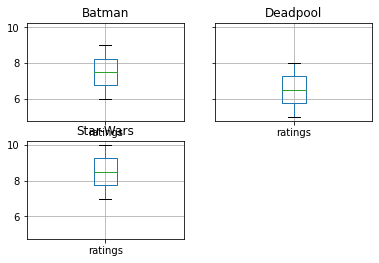

In [41]:
movieFrame.groupby(by='movies').boxplot()